In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/chest-xray-covid19-pneumonia_v1.zip.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/PNEUMONIA/PNEUMONIA(2129).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(1283).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(1856).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(2250).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(50).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(2606).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(1761).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(837).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(577).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(1322).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(2843).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(337).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(2713).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(553).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(1438).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(1071).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(1520).jpg  
  inflating: train/PNEUMONIA/PNEUMONIA(3396).jpg  
  inflating: train/PNEUMONIA/PNEUMONI

In [ ]:
import os,cv2
import numpy as np
from keras.utils import np_utils

In [ ]:
data_path = '/content/train'

In [ ]:
categories = os.listdir(data_path)
categories

['PNEUMONIA', 'NORMAL', 'COVID19']

In [ ]:
labels = [i for i in range(len(categories))]
labels

[0, 1, 2]

In [ ]:
label_dict = dict(zip(categories,labels))
label_dict

{'COVID19': 2, 'NORMAL': 1, 'PNEUMONIA': 0}

In [ ]:
print(label_dict)
print(categories)
print(labels)

{'PNEUMONIA': 0, 'NORMAL': 1, 'COVID19': 2}
['PNEUMONIA', 'NORMAL', 'COVID19']
[0, 1, 2]


In [ ]:
image_size = 224
data_train = [] #For Images
target_train = [] #For labels

# Load Images
for category in categories:
    folder_path = os.path.join(data_path,category)#/content/train/PNEUMONIA
    folder_path
    image_names = os.listdir(folder_path)
    image_names
    for image_name in image_names:
        image_path = os.path.join(folder_path,image_name)#/content/train/PNEUMONIA/image_name
        img = cv2.imread(image_path)

        try:
            #preprocessing
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Convert image color to GRAY
            gray = cv2.GaussianBlur(gray, (5,5), 1) # remove the noise 
            resize = cv2.resize(gray,(image_size,image_size)) #resize the image(scaling)
            data_train.append(resize)
            target_train.append(label_dict[category])

        except Exception as e:
            print("Exception ",e)

In [ ]:
#preprocessing
data_train=np.array(data_train)/255.0 #Normalization
data_train=np.reshape(data_train,(data_train.shape[0],image_size,image_size,1)) #reshape the images(scaling)
target_train=np.array(target_train)
print(target_train)

[0 0 0 ... 2 2 2]


In [ ]:
new_target_train=np_utils.to_categorical(target_train) #One Hot Encoding
new_target_train
print(new_target_train)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
data_path = '/content/test'

In [ ]:
categories = os.listdir(data_path)
categories

['PNEUMONIA', 'NORMAL', 'COVID19']

In [ ]:
labels = [i for i in range(len(categories))]
labels

[0, 1, 2]

In [ ]:
label_dict = dict(zip(categories,labels))
label_dict

{'COVID19': 2, 'NORMAL': 1, 'PNEUMONIA': 0}

In [ ]:
print(label_dict)
print(categories)
print(labels)

{'PNEUMONIA': 0, 'NORMAL': 1, 'COVID19': 2}
['PNEUMONIA', 'NORMAL', 'COVID19']
[0, 1, 2]


In [ ]:
image_size = 224
data_test = []
target_test = []


for category in categories:
    folder_path = os.path.join(data_path,category)
    folder_path
    image_names = os.listdir(folder_path)
    image_names
    for image_name in image_names:
        image_path = os.path.join(folder_path,image_name)
        img = cv2.imread(image_path)

        try:
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Convert image color to GRAY
            gray = cv2.GaussianBlur(gray, (5,5), 1)
            resize = cv2.resize(gray,(image_size,image_size))
            data_test.append(resize)
            target_test.append(label_dict[category])

        except Exception as e:
            print("Exception ",e)

In [ ]:
data_test=np.array(data_test)/255.0
data_test=np.reshape(data_test,(data_test.shape[0],image_size,image_size,1))
target_test=np.array(target_test)
print(target_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
new_target_test=np_utils.to_categorical(target_test)
new_target_test
print(new_target_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
data_path = '/content/val'

In [ ]:
categories = os.listdir(data_path)
categories

['PNEUMONIA', 'NORMAL', 'COVID19']

In [ ]:
labels = [i for i in range(len(categories))]
labels

[0, 1, 2]

In [ ]:
label_dict = dict(zip(categories,labels))
label_dict

{'COVID19': 2, 'NORMAL': 1, 'PNEUMONIA': 0}

In [ ]:
print(label_dict)
print(categories)
print(labels)

{'PNEUMONIA': 0, 'NORMAL': 1, 'COVID19': 2}
['PNEUMONIA', 'NORMAL', 'COVID19']
[0, 1, 2]


In [ ]:
image_size = 224
data_val = []
target_val = []


for category in categories:
    folder_path = os.path.join(data_path,category)
    folder_path
    image_names = os.listdir(folder_path)
    image_names
    for image_name in image_names:
        image_path = os.path.join(folder_path,image_name)
        img = cv2.imread(image_path)

        try:
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Convert image color to GRAY
            gray = cv2.GaussianBlur(gray, (5,5), 1)
            resize = cv2.resize(gray,(image_size,image_size))
            data_val.append(resize)
            target_val.append(label_dict[category])

        except Exception as e:
            print("Exception ",e)

In [ ]:
data_val=np.array(data_val)/255.0
data_val=np.reshape(data_val,(data_val.shape[0],image_size,image_size,1))
target_val=np.array(target_val)
print(target_val)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [ ]:
new_target_val=np_utils.to_categorical(target_val)
new_target_val
print(new_target_val)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=(224,224,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3) ,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(units=256, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 256)      0

In [ ]:
  result = model.fit(data_train,new_target_train, epochs=20, validation_data=(data_val,new_target_val))

Epoch 1/20
225/225 [==============================] - 52s 172ms/step - loss: 0.6540 - accuracy: 0.7137 - val_loss: 0.4138 - val_accuracy: 0.8222
Epoch 2/20
225/225 [==============================] - 36s 161ms/step - loss: 0.4282 - accuracy: 0.8237 - val_loss: 0.3482 - val_accuracy: 0.8600
Epoch 3/20
225/225 [==============================] - 37s 165ms/step - loss: 0.3468 - accuracy: 0.8619 - val_loss: 0.2969 - val_accuracy: 0.8889
Epoch 4/20
225/225 [==============================] - 37s 164ms/step - loss: 0.2890 - accuracy: 0.8890 - val_loss: 0.3113 - val_accuracy: 0.8811
Epoch 5/20
225/225 [==============================] - 37s 163ms/step - loss: 0.2519 - accuracy: 0.9053 - val_loss: 0.2518 - val_accuracy: 0.9122
Epoch 6/20
225/225 [==============================] - 37s 164ms/step - loss: 0.2205 - accuracy: 0.9186 - val_loss: 0.2495 - val_accuracy: 0.9044
Epoch 7/20
225/225 [==============================] - 37s 164ms/step - loss: 0.1946 - accuracy: 0.9278 - val_loss: 0.2383 - val_ac

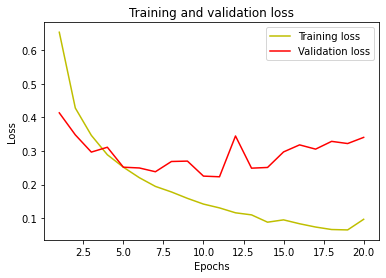

In [ ]:
import matplotlib.pyplot as plt
loss = result.history['loss']
val_loss = result.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

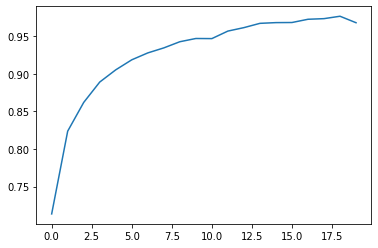

In [ ]:
plt.plot(result.history['accuracy'])

In [ ]:
import pandas as pd

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.654034,0.713670,0.413779,0.822222
1,0.428231,0.823701,0.348229,0.860000
2,0.346780,0.861906,0.296867,0.888889
3,0.288984,0.888997,0.311313,0.881111
4,0.251870,0.905251,0.251824,0.912222
5,0.220489,0.918589,0.249540,0.904444
6,0.194601,0.927758,0.238308,0.925556
7,0.178077,0.934426,0.268848,0.937778
8,0.158973,0.942623,0.270020,0.926667
9,0.141923,0.946930,0.225284,0.930000


In [ ]:
model.evaluate(data_test,new_target_test)

29/29 [==============================] - 2s 74ms/step - loss: 0.2517 - accuracy: 0.9501


[0.2516670525074005, 0.9501108527183533]

In [ ]:
model.save('covid_19_org1.h5')

In [ ]:
pred = model.predict(data_test)

In [ ]:
y_pred=np.argmax(pred, axis=1)
y_test=np.argmax(new_target_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[287  13   1]
 [  5 273  22]
 [  2   2 297]]


In [ ]:
df = pd.DataFrame(cf_matrix,index = categories,columns = categories)
df

,PNEUMONIA,NORMAL,COVID19
PNEUMONIA,287,13,1
NORMAL,5,273,22
COVID19,2,2,297


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred,target_names=categories))

              precision    recall  f1-score   support

   PNEUMONIA       0.98      0.95      0.96       301
      NORMAL       0.95      0.91      0.93       300
     COVID19       0.93      0.99      0.96       301

    accuracy                           0.95       902
   macro avg       0.95      0.95      0.95       902
weighted avg       0.95      0.95      0.95       902



<Figure size 432x288 with 0 Axes>

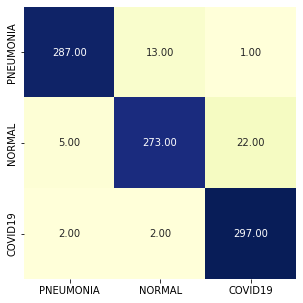

In [ ]:
import seaborn as sn

plt.clf()
fig = plt.figure(figsize= (20,5))
ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sn.heatmap(df, annot=True, fmt='.2f', cmap="YlGnBu", cbar=False)

plt.savefig("crosstab_pandas.png", bbox_inches='tight', dpi=100)

plt.show()

In [ ]:
import pandas as pd 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
df = pd.DataFrame()
df.loc['Test Results', 'Accuracy'] = accuracy_score(y_test, y_pred)
df.loc['Test Results', 'Precision'] = precision_score(y_test, y_pred, average="macro")
df.loc['Test Results', 'Recall'] = recall_score(y_test, y_pred, average="macro")
df.loc['Test Results', 'F1-score'] = f1_score(y_test, y_pred, average="macro")

In [ ]:
df

,Accuracy,Precision,Recall,F1-score
Test Results,0.950111,0.950744,0.950066,0.949933


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/covid_19_org1.h5')

In [ ]:
import cv2
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def pre(im):
  image = cv2.imread(im)
  gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) #Convert image color to GRAY
  gray = cv2.GaussianBlur(gray, (5,5), 1)
  resize_image = cv2.resize(gray,(image_size,image_size))
  resize_image=np.array(resize_image)/255.0 #Normalization

  return resize_image

In [ ]:
img = '/content/Viral Pneumonia-61.png'

In [ ]:
image = pre(img)

In [ ]:
pred = model.predict(image.reshape(1, 224, 224, 1), batch_size=1)

In [ ]:
pred.argmax()

0

In [ ]:
print("Model predicted : " + str(list(label_dict.keys())[list(label_dict.values()).index(pred.argmax())]))

Model predicted : PNEUMONIA
